In [1]:
# Importing libraries 
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt

# Set max row to 300
pd.set_option('display.max_rows', 300)

In [3]:
# Define simulation function
def simulate_path(s0, mu, sigma, horizon, timesteps, n_sims):
    
    # set the seed
    random.seed(2023)
    
    # read the params
    S0 = s0
    r = mu
    T = horizon
    t = timesteps
    n = n_sims
    
    # define dt
    dt = T/t
    
    # simulate path
    S = zeros((t, n))
    S[0] = S0
    
    for i in range(0, t-1):
        w = random.standard_normal(n)
        S[i+1] = S[i] * (1 + r*dt + sigma*sqrt(dt)*w)
        
    return S

In [5]:
# Assign simulated price path to dataframe for analysis and plotting
price_path = pd.DataFrame(simulate_path(100,
                                        0.05,
                                        0.2,
                                        1,
                                        252,
                                        100000))

# Verify the generated price paths
price_path.head()

,0,1,2,3,4,5,6,7,8,9,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
1,100.916466,99.611029,98.757603,100.317489,99.891132,98.581948,103.364080,101.834833,100.144446,96.087080,...,100.526533,98.860239,98.837148,100.039456,98.913105,99.580159,99.246204,99.383916,98.362717,100.002582
2,101.102047,99.252871,98.060186,100.326270,98.603518,100.717457,104.176433,100.222994,101.468809,95.026936,...,101.555214,97.144692,99.130006,100.251700,97.617909,99.474348,98.328044,100.179019,98.775283,99.668132
3,100.572272,100.383399,98.151705,100.305081,100.957863,101.003838,105.040394,96.817626,100.584172,93.812262,...,100.687368,95.671818,98.864215,100.339384,98.261258,101.356891,97.348343,100.076692,98.885967,98.173543
4,100.103597,100.482743,99.225147,100.341161,100.908313,100.437038,104.973611,96.873934,99.199344,92.857468,...,103.588192,96.954031,100.491272,99.724911,98.236881,100.712394,97.737062,99.770981,97.046760,97.968690


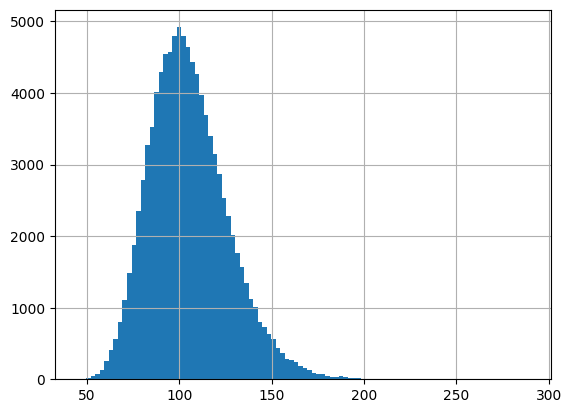

In [6]:
# Plot the histogram of the simulated price path at maturity
price_path.iloc[-1].hist(bins=100);

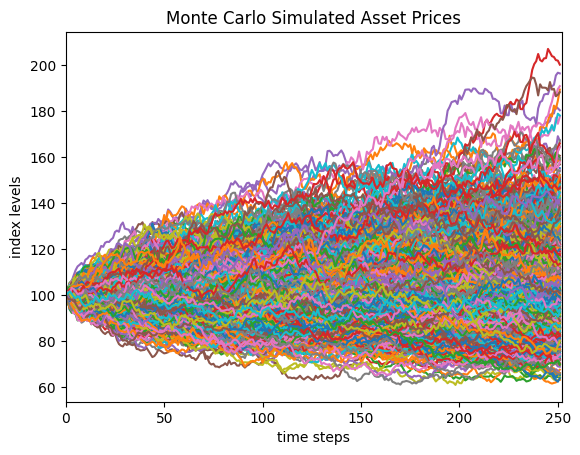

In [7]:
# Plot initial 100 simulated path using matplotlib
plt.plot(price_path.iloc[:,:1000])
plt.xlabel('time steps')
plt.xlim(0,252)
plt.ylabel('index levels')
plt.title('Monte Carlo Simulated Asset Prices');

In [8]:
# Call the simulation function
S = simulate_path(100, 0.05, 0.2, 1, 252, 100000)

# Define parameters
K = 100; r = 0.05; T = 1

In [9]:
# Calculate the discounted value of the expected payoff
CO = exp(-r*T) * mean(maximum(0, S[-1] - K))
PO = exp(-r*T) * mean(maximum(0, K - S[-1]))

# Print the values
print(f"European call option value is {CO:0.4f}")
print(f"European put option value is {PO:0.4f}")

European call option value is 10.4688
European put option value is 5.5756


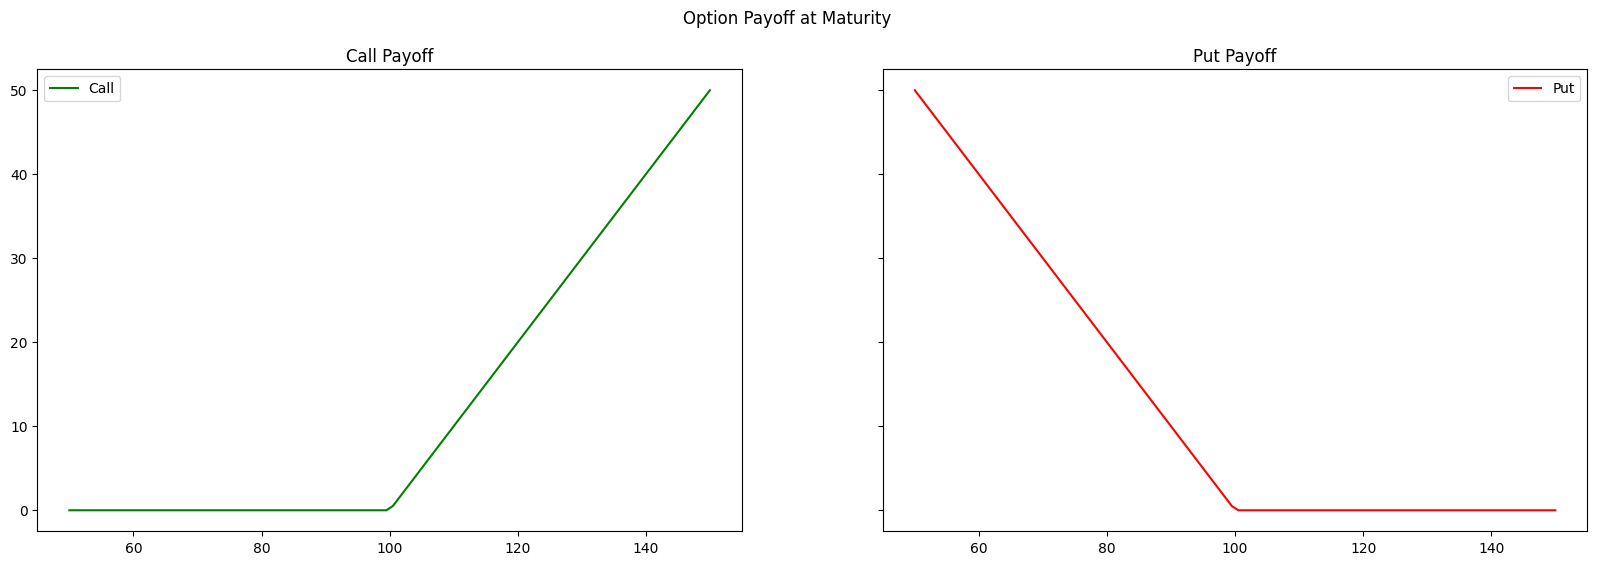

In [10]:
# range of spot price
sT = linspace(50, 150, 100)

# Visualize call and put price for range of spot prices
figure, axes = plt.subplots(1,2, figsize=(20,6), sharey=True)
title = ['Call Payoff', 'Put Payoff']
payoff = [maximum(sT - K, 0), maximum(K - sT, 0)]
color = ['green', 'red']
label = ['Call', 'Put']

# Plot payoff
for i in range(2):
    axes[i].plot(sT, payoff[i], color=color[i], label=label[i])
    axes[i].set_title(title[i])
    axes[i].legend()

figure.suptitle('Option Payoff at Maturity');


In [12]:
# Average price
A = S.mean(axis=0)

CO = exp(-r*T) * mean(maximum(0, A-K))
PO = exp(-r*T) * mean(maximum(0, K-A))

# Print the values
print(f"Asian Call Option Value is {CO:0.4f}")
print(f"Asian Put Option Value is {PO:0.4f}")

Asian Call Option Value is 5.7777
Asian Put Option Value is 3.3600


In [13]:
# Call the simulation function
S = simulate_path(100,0.05,0.2,1,252,100000)

# Define parameters
K=100
B=150
r=0.05
sigma=0.20
T=1
t=252
dt=T/t
n=100000
rebate = 10
value=0

# Barrier shift - continuity correction for discrete monitoring
B_shift = B*exp(0.5826*sigma*sqrt(dt))
B_shift

# Calculate the discounted value of the expeced payoff
for i in range(n):
    if S[:,i].max() < B_shift:
        value += maximum(0, S[-1,i]-K)
    else:
        value += rebate
    
C0 = exp(-r*T) * value/n

# Print the values
print(f"Up-and-Out Barrier Call Option Value is {C0:0.4f}")

Up-and-Out Barrier Call Option Value is 8.3939


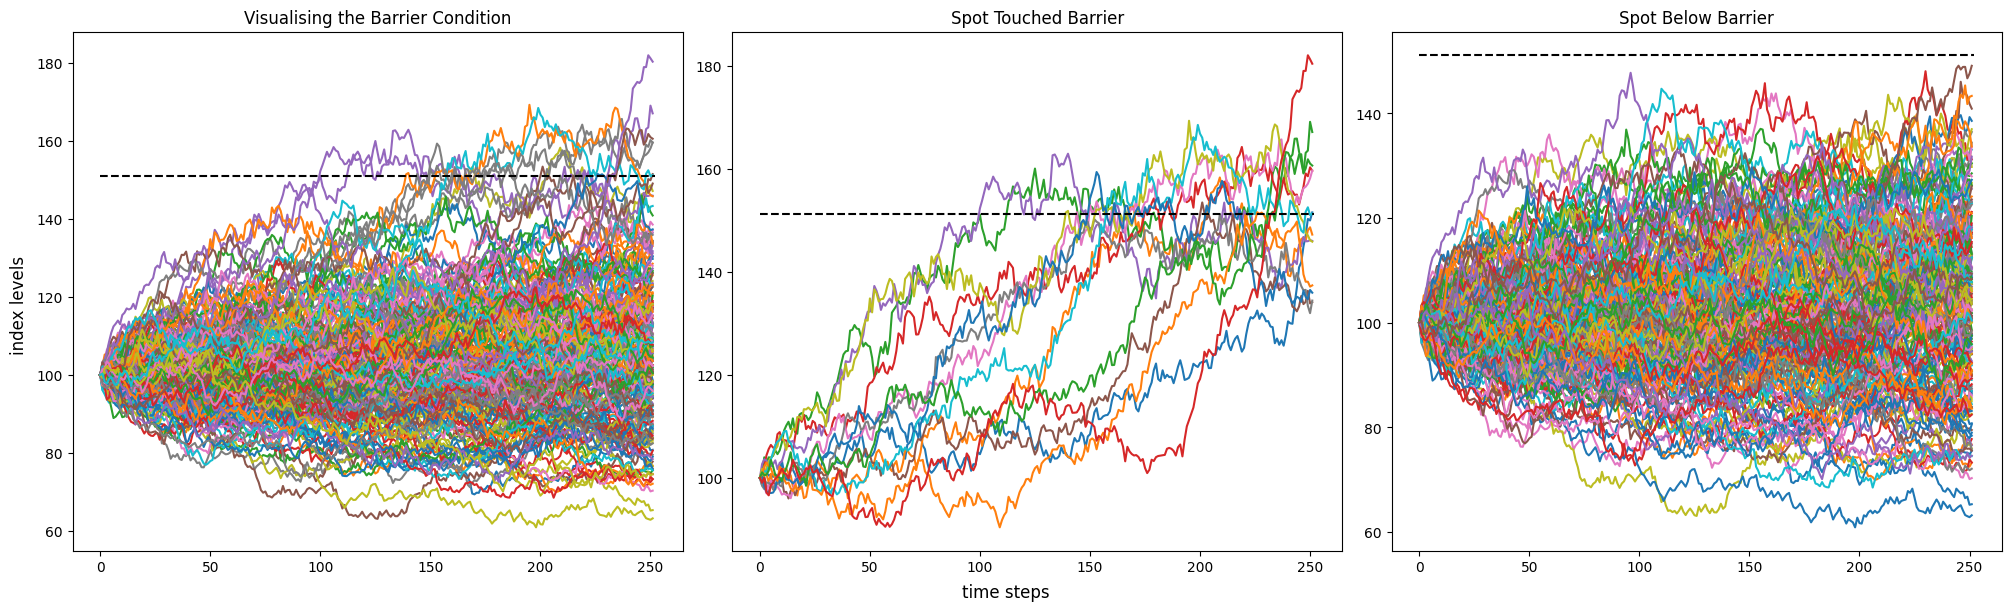

In [14]:
figure, axes = plt.subplots(1,
                            3, 
                            figsize=(20,6), 
                            constrained_layout=True)
title = ['Visualising the Barrier Condition', 
         'Spot Touched Barrier', 
         'Spot Below Barrier']

axes[0].plot(S[:,:200])
for i in range(200):
    axes[1].plot(S[:,i]) if S[:,i].max() > B_shift else axes[2].plot(S[:,i])

for i in range(3):
    axes[i].set_title(title[i])
    axes[i].hlines(B_shift, 0, 252, colors='k', linestyles='dashed')

figure.supxlabel('time steps')
figure.supylabel('index levels')

plt.show()